In [44]:
#package installation boxes should not include any text or any other package and one package at a time.

In [9]:
pip install matplotlib 

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ---------------------------------------- 8.1/8.1 MB 55.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 42.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 12.8/12.8 MB 66.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
#pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install os

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [1]:
import os
os. getcwd()

'C:\\Users\\ark007\\Downloads'

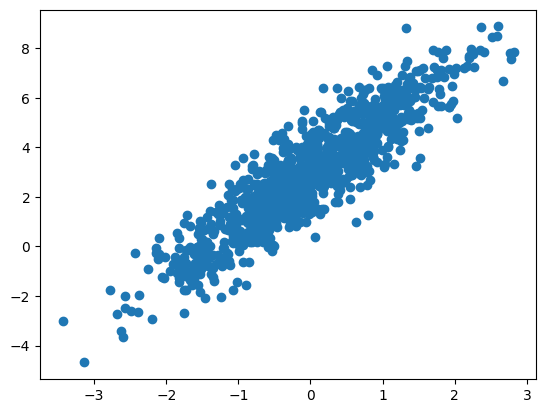

In [13]:
import numpy as np
#import pandas as pd    #  Mostly not needed, numpy has all the required functionalities
import matplotlib.pyplot as plt

x = np.random.normal(0, 1, 1000)
y = 3+2*x + np.random.normal(0, 1, 1000)

plt.scatter(x, y)
plt.show()

In [17]:
# Initialization
beta2 = 0
beta1 = 0

L = 0.01  # The learning Rate

Total_itr = 1000  # The number of iterations to perform gradient descent

n = float(len(x)) # Number of elements in X

lossold = sum((y-beta1-beta2*x)**2)
lossnew = lossold

alpha = 0

lossvec = np.zeros((Total_itr,1))

# Performing Gradient Descent 
for itr in range(Total_itr): 
    beta20 = beta2
    beta10 = beta1
    lossold = lossnew
    y_hat = beta1 + beta2*x  # The current predicted value of Y
    derivbeta2 = (-2/n) * sum(x * (y - y_hat))  # Derivative wrt beta2
    derivbeta1 = (-2/n) * sum(y - y_hat)  # Derivative wrt beta1
    beta2 = beta2 - L * derivbeta2  # Update beta2
    beta1 = beta1 - L * derivbeta1  # Update beta1
    
    lossnew = sum((y-beta1-beta2*x)**2)
    
    
    # Implementation of Section 5.2 from the notes 
    L1 = L
    changeL = 0
    while(lossnew > lossold -alpha * L1*np.sum(derivbeta1**2+derivbeta2**2)):
        changeL = changeL + 1
        L1 = L1/2 #Reducing the step size
        
        beta2 = beta20 - L1 * derivbeta2  # Update beta2
        beta1 = beta10 - L1 * derivbeta1  # Update beta1
    
        lossnew = sum((y-beta1-beta2*x)**2)
        
        if(changeL > 20):
            beta2 = beta20
            beta1 = beta10
            #beta = beta0 #Could not update, so old value reassigned
            break;
            
    lossvec[itr] = lossold
        
    
print (beta1, beta2)

3.0201639727523437 2.042061482893207


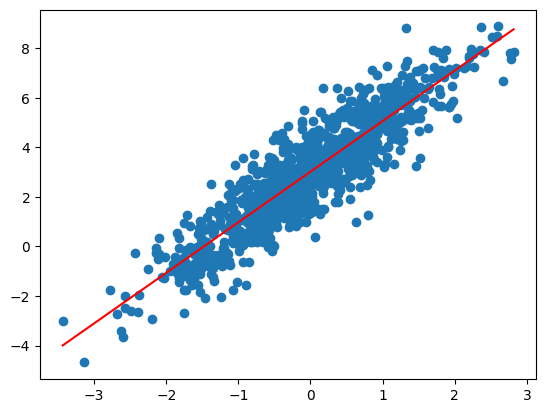

In [19]:
y_fitted = beta1 + beta2*x

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(y_fitted), max(y_fitted)], color='red')  # regression line
plt.show()

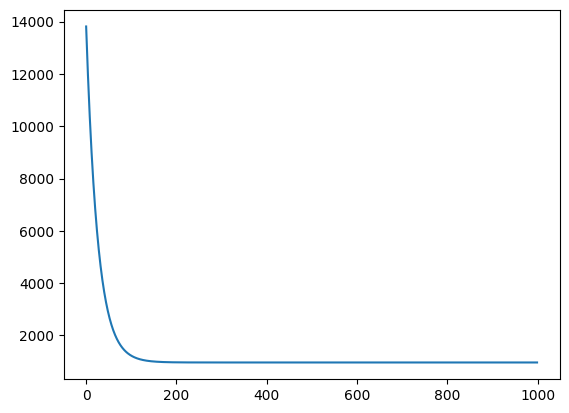

In [21]:
plt.plot(lossvec)

In [23]:
## Update as vector

x = np.random.normal(0, 1, 1000)
y = 3+2*x + np.random.normal(0, 1, 1000)

# Initialization
beta = np.repeat(0, 2)

L = 0.01  # The learning Rate

Total_itr = 1000  # The number of iterations to perform gradient descent

n = len(x) # Number of elements in X
X = np.column_stack((np.repeat(1, n), x))

lossold = sum((y-X.dot(beta))**2)
lossnew = lossold

alpha = 0

lossvec = np.zeros((Total_itr,1))

# Performing Gradient Descent 
for itr in range(Total_itr): 
    beta0 =beta
    lossold = lossnew
    y_hat = X.dot(beta)  # The current predicted value of Y
    
    derivbeta = (-2/n)*np.dot(np.transpose(X), (y-y_hat))
    beta = beta - L*derivbeta
    
    lossnew = sum((y-X.dot(beta))**2)
    
    # Implementation of Section 5.2 from the notes 
    L1 = L
    changeL = 0
    while(lossnew > lossold -alpha * L1*np.sum(derivbeta**2)):
        changeL = changeL + 1
        L1 = L1/2 #Reducing the step size
        
        beta = beta0 - L1*derivbeta
    
        lossnew = sum((y-X.dot(beta))**2)
        
        if(changeL > 20):
            beta = beta0 #Could not update, so old value reassigned
            break;
            
    lossvec[itr] = lossold
        
    
print (beta)

[3.05536516 2.05163366]


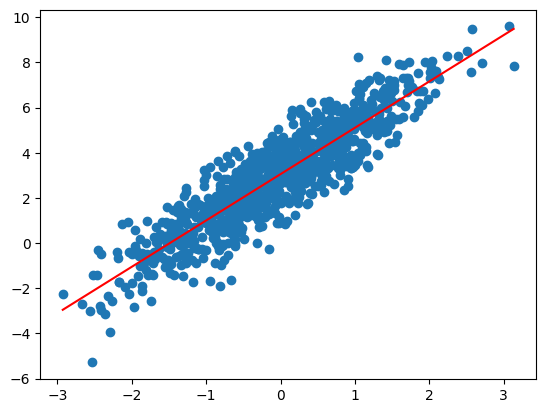

In [25]:
y_fitted = X.dot(beta)

plt.scatter(x, y) 
plt.plot([min(x), max(x)], [min(y_fitted), max(y_fitted)], color='red')  # regression line
plt.show()

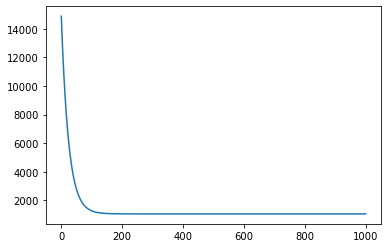

In [190]:
plt.plot(lossvec)

In [127]:
####################################Logistic Regression##############################
import numpy as np

from numpy import genfromtxt
mydata = np.matrix(genfromtxt('https://stats.idre.ucla.edu/stat/data/binary.csv', delimiter=',',skip_header=1))

In [128]:
#Some basic manipulation for matrices

mydata.shape

(400, 4)

In [129]:
np.shape(mydata)[0]

400

In [130]:
mydata.view()

matrix([[  0.  , 380.  ,   3.61,   3.  ],
        [  1.  , 660.  ,   3.67,   3.  ],
        [  1.  , 800.  ,   4.  ,   1.  ],
        ...,
        [  0.  , 460.  ,   2.63,   2.  ],
        [  0.  , 700.  ,   3.65,   2.  ],
        [  0.  , 600.  ,   3.89,   3.  ]])

In [131]:
mydata[:6]  #To view head, the first 6 rows

matrix([[  0.  , 380.  ,   3.61,   3.  ],
        [  1.  , 660.  ,   3.67,   3.  ],
        [  1.  , 800.  ,   4.  ,   1.  ],
        [  1.  , 640.  ,   3.19,   4.  ],
        [  0.  , 520.  ,   2.93,   4.  ],
        [  1.  , 760.  ,   3.  ,   2.  ]])

In [132]:
mydata[0:6,:] #To print the same thing differently 

matrix([[  0.  , 380.  ,   3.61,   3.  ],
        [  1.  , 660.  ,   3.67,   3.  ],
        [  1.  , 800.  ,   4.  ,   1.  ],
        [  1.  , 640.  ,   3.19,   4.  ],
        [  0.  , 520.  ,   2.93,   4.  ],
        [  1.  , 760.  ,   3.  ,   2.  ]])

In [133]:
#Fit admit ~ gre + gpa + rank model using logistic regression
y = mydata[:,0]
X = mydata[:,[1, 2, 3] ] 

In [134]:
X[0:5,:]

matrix([[380.  ,   3.61,   3.  ],
        [660.  ,   3.67,   3.  ],
        [800.  ,   4.  ,   1.  ],
        [640.  ,   3.19,   4.  ],
        [520.  ,   2.93,   4.  ]])

In [135]:
X = mydata[:,1: ] 

In [136]:
X[0:5,:]

matrix([[380.  ,   3.61,   3.  ],
        [660.  ,   3.67,   3.  ],
        [800.  ,   4.  ,   1.  ],
        [640.  ,   3.19,   4.  ],
        [520.  ,   2.93,   4.  ]])